In [ ]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
place_name = "Boston, Massachusetts"
graph = ox.graph_from_place(place_name, network_type="all")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(graph)

In [ ]:
gdf_nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
30730954,42.367608,-71.021817,3,NaN,NaN,POINT (-71.02182 42.36761)
30730955,42.367523,-71.021849,3,NaN,NaN,POINT (-71.02185 42.36752)
30730967,42.366568,-71.021794,4,NaN,NaN,POINT (-71.02179 42.36657)
30731113,42.373395,-71.036657,3,NaN,NaN,POINT (-71.03666 42.37339)
61178875,42.382149,-71.080878,4,NaN,NaN,POINT (-71.08088 42.38215)


In [ ]:
gdf_nodes.shape

(63669, 6)

In [ ]:
gdf_nodes['street_count'].unique()

array([3, 4, 1, 2, 5, 6, 7, 8])

In [ ]:
gdf_nodes['highway'].unique()

array([nan, 'traffic_signals', 'stop', 'crossing', 'turning_circle',
       'motorway_junction', 'priority', 'turning_loop', 'elevator',
       'bus_stop', 'give_way', 'street_lamp', 'trailhead'], dtype=object)

In [ ]:
gdf_nodes['ref'].unique()

array([nan, '19', '15A', '14', '13A', '13B', '137', '134 A-B-C', '133',
       '131', '15B', '135-134', '17B-A', '74614', '135', '18', '134C-B',
       '134A-B-C', '16', '17B;17A', '16A', '15', '151', '1839', '16B',
       '20B;20A', 'E202', 'E4', 'E5', 'E6', 'E7', 'E8', 'C203', '17',
       'Service Area C', 'A', 'B', '030', 'Tracks 1 & 3', 'Track 2',
       'Tracks 5 & 7', 'TE-609', 'TE-185', 'TE-183', '1616', 'E13', 'E14',
       'E15', 'E16', 'B211', 'E8A (Bus Gate)', '12', 'E9', 'E14A', 'E15A'],
      dtype=object)

In [ ]:
gdf_nodes.isnull().sum()

,0
y,0
x,0
street_count,0
highway,50025
ref,63611
geometry,0


In [ ]:
gdf_edges.head()

osmid                name      highway maxspeed  \
u        v          key                                                        
30730954 8246764113 0    197230701  Logan Memorial Way  residential   25 mph   
         61441677   0    197230699  Logan Memorial Way  residential   25 mph   
30730955 8246764113 0    197230701  Logan Memorial Way  residential   25 mph   
         5325689133 0    551460133                 NaN      service      NaN   
         9961087361 0    197230701  Logan Memorial Way  residential   25 mph   

                         oneway reversed  length lanes  \
u        v          key                                  
30730954 8246764113 0     False    False   7.219   NaN   
         61441677   0      True    False  33.072     2   
30730955 8246764113 0     False     True   2.640   NaN   
         5325689133 0     False    False  46.129   NaN   
         9961087361 0     False    False  20.051   NaN   

                                                                  geometry  \
u        v          key                                                      
30730954 8246764113 0    LINESTRING (-71.02182 42.36761, -71.02184 42.3...   
         61441677   0    LINESTRING (-71.02182 42.36761, -71.02178 42.3...   
30730955 8246764113 0    LINESTRING (-71.02185 42.36752, -71.02184 42.3...   
         5325689133 0    LINESTRING (-71.02185 42.36752, -71.02233 42.3...   
         9961087361 0    LINESTRING (-71.02185 42.36752, -71.02189 42.3...   

                               service bridge width  ref access tunnel  \
u        v          key                                                  
30730954 8246764113 0              NaN    NaN   NaN  NaN    NaN    NaN   
         61441677   0              NaN    NaN   NaN  NaN    NaN    NaN   
30730955 8246764113 0              NaN    NaN   NaN  NaN    NaN    NaN   
         5325689133 0    parking_aisle    NaN   NaN  NaN    NaN    NaN   
         9961087361 0              NaN    NaN   NaN  NaN    NaN    NaN   

                        junction area  
u        v          key                
30730954 8246764113 0        NaN  NaN  
         61441677   0        NaN  NaN  
30730955 8246764113 0        NaN  NaN  
         5325689133 0        NaN  NaN  
         9961087361 0        NaN  NaN

In [ ]:
gdf_edges.shape

(179855, 17)

In [ ]:
gdf_edges.isnull().sum()

,0
osmid,0
name,123279
highway,0
maxspeed,140402
oneway,0
reversed,0
length,0
lanes,130115
geometry,0
service,168977


In [ ]:
gdf_edges['name'] = gdf_edges['name'].apply(lambda x: \
                                            tuple(x) if isinstance(x, list) else x)
gdf_edges['name'].unique()

array(['Logan Memorial Way', nan, 'Skybridge to Hilton', ...,
       'Salem Court', ('Ritchie Street', 'Columbus Avenue'),
       'Harold Place'], dtype=object)

In [ ]:
gdf_edges['highway'] = gdf_edges['highway'].apply(lambda x: \
                                            tuple(x) if isinstance(x, list) else x)
gdf_edges['highway'].unique()

array(['residential', 'service', 'footway', ('footway', 'steps'),
       'primary', 'tertiary', 'secondary', 'cycleway',
       ('footway', 'service'), 'unclassified', 'trunk', 'steps', 'path',
       'primary_link', 'pedestrian', 'trunk_link',
       ('residential', 'service'), ('residential', 'footway'),
       ('residential', 'path'), 'motorway_link', 'secondary_link',
       'motorway', ('footway', 'path'), 'track',
       ('residential', 'cycleway'), 'tertiary_link', 'living_street',
       ('residential', 'living_street'), ('residential', 'track'),
       ('track', 'residential'), ('steps', 'path'),
       ('residential', 'steps'), ('unclassified', 'service'),
       ('steps', 'footway'), ('footway', 'path', 'steps'), 'busway',
       ('cycleway', 'service'), ('track', 'footway'), ('track', 'path'),
       ('footway', 'cycleway'), ('track', 'service'),
       ('unclassified', 'footway'), ('pedestrian', 'service'),
       'emergency_bay', ('residential', 'footway', 'steps'),
     

In [ ]:
gdf_edges['highway'].value_counts()

,count
highway,
footway,87281
service,32818
residential,28286
secondary,8462
primary,6026
...,...
"[motorway, trunk]",1
"[residential, unclassified]",1
emergency_bay,1


In [ ]:
gdf_edges['maxspeed'].value_counts()

,count
maxspeed,
25 mph,34922
20 mph,1356
30 mph,1029
10 mph,715
5 mph,482
35 mph,364
15 mph,242
40 mph,77
45 mph,73


In [ ]:
gdf_edges['oneway'].value_counts()

,count
oneway,
False,161616
True,18239


In [ ]:
gdf_edges['reversed'].value_counts()

,count
reversed,
False,97557
True,79318
"[False, True]",2980


In [ ]:
gdf_edges['length'].describe()

,length
count,179855.000000
mean,43.199419
std,64.561097
min,0.000000
25%,7.505000
50%,20.108000
75%,56.902000
max,3318.035000


In [ ]:
gdf_edges['lanes'].value_counts()

,count
lanes,
2,34925
1,10696
3,1702
4,1502
"[2, 3]",401
5,159
"[1, 2]",129
"[4, 5]",70
"[4, 3]",58


In [ ]:
gdf_edges['service'] = gdf_edges['service'].apply(lambda x: \
                                            tuple(x) if isinstance(x, list) else x)
gdf_edges['service'].unique()

array([nan, 'parking_aisle', 'driveway', 'alley', 'emergency_access',
       'school driveway', ('alley', 'parking_aisle'),
       ('parking_aisle', 'alley'), 'cemetary drive', 'drive-through',
       'yard', ('driveway', 'parking_aisle'), ('driveway', 'alley'),
       'Bus_Lane', 'slipway', 'siding'], dtype=object)

In [ ]:
gdf_edges['bridge'] = gdf_edges['bridge'].apply(lambda x: \
                                            tuple(x) if isinstance(x, list) else x)
gdf_edges['bridge'].unique()

array([nan, 'covered', 'yes', ('movable', 'yes'), 'movable', 'viaduct',
       'boardwalk', 'pedestrian'], dtype=object)

In [ ]:
gdf_edges['width'].value_counts()

,count
width,
12.2,9064
15.2,4128
18.3,1962
11.6,1859
12.5,1675
...,...
"[29.6, 25.9, 36.6]",1
"[15.2, 36.0]",1
"[9.1, 8.8]",1


In [ ]:
gdf_edges['tunnel'].value_counts()

,count
tunnel,
yes,456
building_passage,398
passage,14
covered,5
"[passage, yes]",2
"[building_passage, passage]",1
"[passage, building_passage]",1


In [ ]:
gdf_edges['junction'].value_counts()

,count
junction,
roundabout,122
jughandle,10
intersection,2


In [ ]:
gdf_edges['area'].value_counts()

,count
area,
no,7


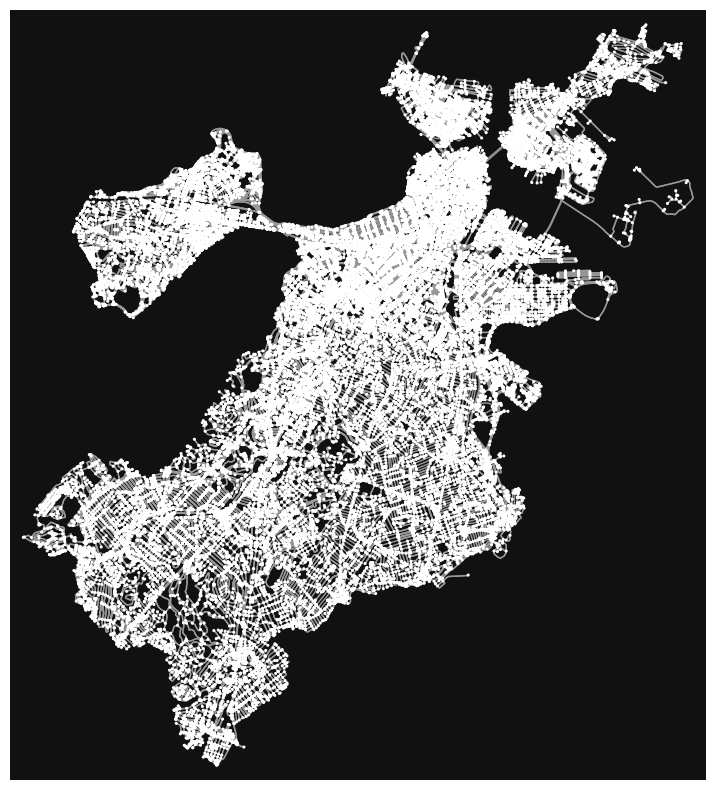

In [ ]:
# Plot the street network
fig, ax = ox.plot_graph(graph, figsize=(10, 10), node_size=5, edge_linewidth=1)

In [ ]:
# Export GeoDataFrames as shapefiles for use in ArcGIS
gdf_nodes.to_file("nodes.shp")
gdf_edges.to_file("edges.shp")

<ipython-input-13-337ca42e011b>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file("nodes.shp")
